<a href="https://colab.research.google.com/github/shayar/DM-Final-Project/blob/main/MJC_SS_Data_Mining_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Data Mining Final Project

by

Matthew Curran and

Shayar Shrestha

# Load Data

In [205]:
import pandas as pd

url = 'http://pluto.hood.edu/~dong/datasets/CBC_3200.csv'
DATA = pd.read_csv(url, header='infer')
DATA.head(1)

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,1712,14148,0,218,2,2,4,0,0,0,0,0,0,0,0,0,0,1


# Exploratory Data Analysis

In [206]:
# DATA.dtypes
# Result: all columns are of type int.

In [207]:
# Remove ID type columns:
df = DATA.copy(deep = True)
Seq = df['Seq#']
IDs = df['ID#']
df = df.drop(columns = ['Seq#', 'ID#'])
df.head(1)

,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,218,2,2,4,0,0,0,0,0,0,0,0,0,0,1


In [208]:
# Explore columns 'M' thru 'FirstPurch'.
# df['M'].value_counts()
# df['R'].value_counts()
df['F'].value_counts()
# df['FirstPurch'].value_counts()

# Conclusion: these three columns are not one-hot-encoded.

,count
F,
1,998
2,971
3,152
7,135
8,133
11,129
4,124
10,123
12,121


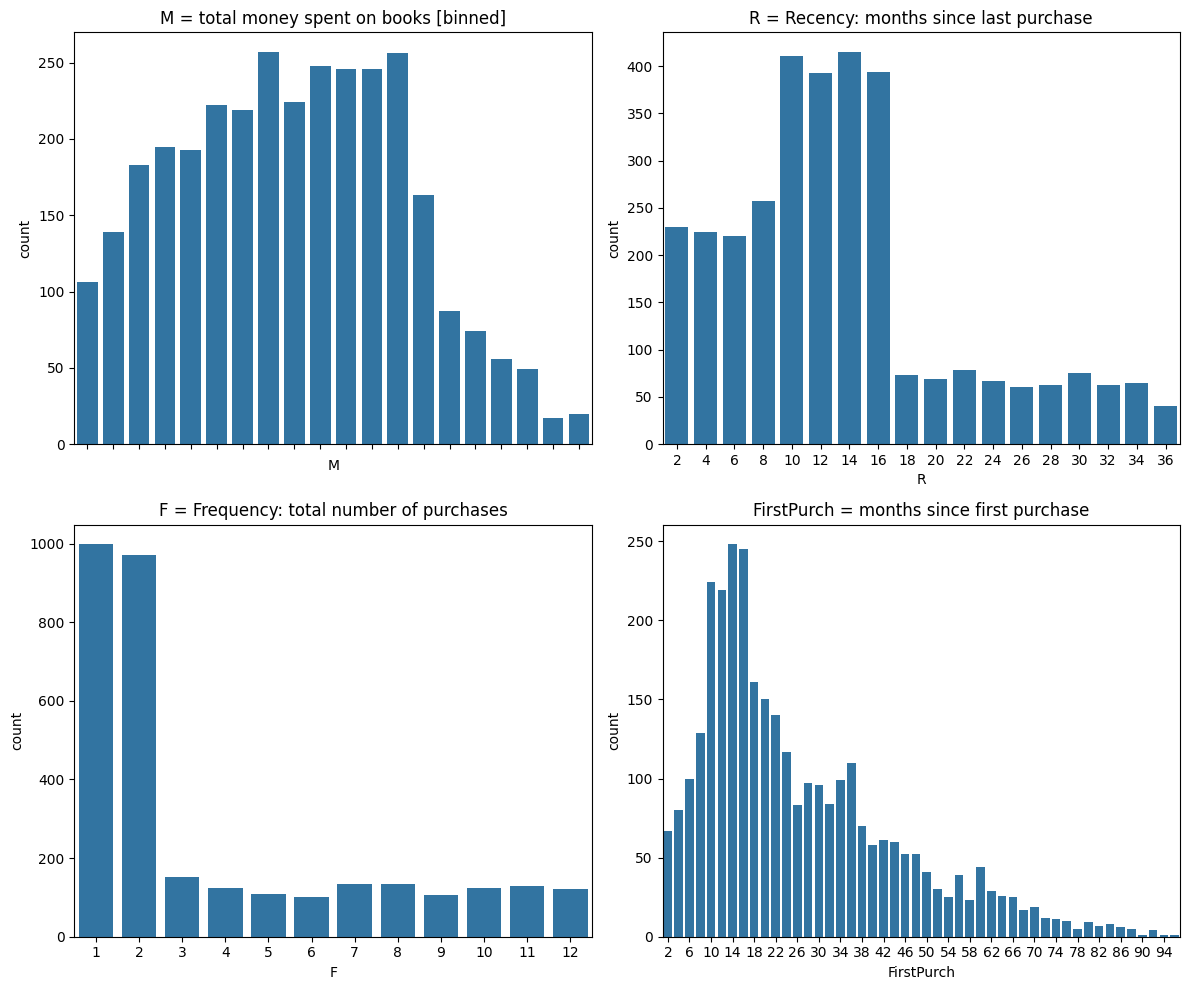

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

bin_edges = pd.cut(df['M'], bins=20)

sns.countplot(x=bin_edges, ax=axs[0, 0])
# sns.countplot(x='M', data=df, ax=axs[0, 0])
axs[0, 0].set_title('M = total money spent on books [binned]')
axs[0, 0].set_xticklabels([])

sns.countplot(x='R', data=df, ax=axs[0, 1])
axs[0, 1].set_title('R = Recency: months since last purchase')

sns.countplot(x='F', data=df, ax=axs[1, 0])
axs[1, 0].set_title('F = Frequency: total number of purchases')

sns.countplot(x='FirstPurch', data=df, ax=axs[1, 1])
axs[1, 1].set_title('FirstPurch = months since first purchase')
axs[1, 1].set_xticks(axs[1, 1].get_xticks()[::2])

plt.tight_layout()
plt.show()

These 4 columns all have interesting distributions. With the exception of 'FirstPurch', none of them looke much like any standard statistical distribution.

'R' and 'FirstPurch' are mostly telling us about the waxing/waning popularity of the store. The both seem to indicate a general decline in popularity starting about 10 months ago.

'FirstPurch' shows that the store peaked in popularity (in terms of new customers) during the period spanning roughly 10-22 months ago.


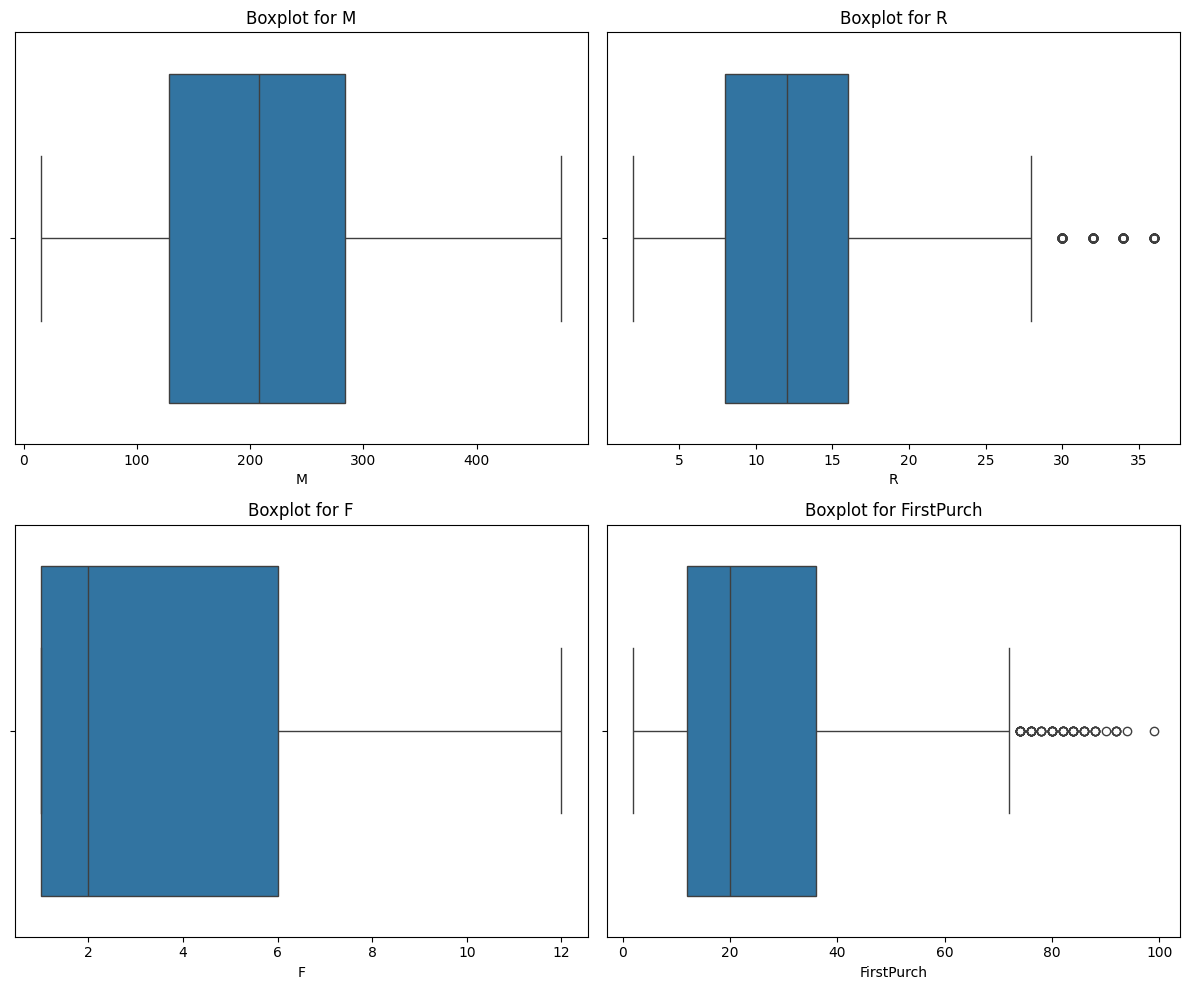

In [210]:
# Outliers.

# Box and whisker plots:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(x=df['M'], ax=axs[0, 0])
axs[0, 0].set_title('Boxplot for M')

sns.boxplot(x=df['R'], ax=axs[0, 1])
axs[0, 1].set_title('Boxplot for R')

sns.boxplot(x=df['F'], ax=axs[1, 0])
axs[1, 0].set_title('Boxplot for F')

sns.boxplot(x=df['FirstPurch'], ax=axs[1, 1])
axs[1, 1].set_title('Boxplot for FirstPurch')

plt.tight_layout()
plt.show()

These plots indicate no outliers for 'M' and 'F', and several outliers for 'R' and 'FirstPurch'. These outliers are simply customers from the earliest days.

One unusual thing we notice is that the earliest customers in 'FirstPurch' datae back to ~100 months ago, but the earliest customers in 'R' date back to only ~36 months ago.

In [211]:
# Print complete record (all columns) of the the customers with 'R' more than 35:
view_01 = df.query('R > 35')
view_02 = view_01.sort_values(by='FirstPurch', ascending=False)
view_02[:10]

# Observation: there are zero customers who bought their last book more than 36
#  months ago, even among the 10+ customers who bought their first book more
#  than 60 months ago.

# Conclusion: there is some gap or error in the record-keeping or
#  record-keeping system, such that any 'R' greater than 36 is
#  not properly recorded.
# The number of records with 'R' = 36 is not extra large, so its unlikely
#  that their 'R' was simply rounded down to 36.

,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
2865,1,281,36,11,92,3,0,2,1,1,1,3,0,0,0,0
573,1,271,36,8,82,1,1,4,0,1,0,0,0,0,0,0
1652,1,287,36,8,76,2,0,2,0,0,0,0,1,0,0,0
2591,0,399,36,7,74,0,0,2,1,1,0,0,0,0,0,0
3040,1,162,36,6,66,1,0,1,1,1,0,0,0,0,0,0
2408,0,374,36,11,66,3,1,2,1,2,0,2,0,0,0,0
2760,0,214,36,7,64,1,0,3,2,0,0,0,0,1,0,0
2856,0,75,36,5,64,1,0,2,0,0,0,1,0,0,0,0
2627,0,393,36,12,64,1,3,2,3,0,2,1,0,0,0,1
1214,0,368,36,5,62,1,2,1,0,1,0,2,0,0,0,0


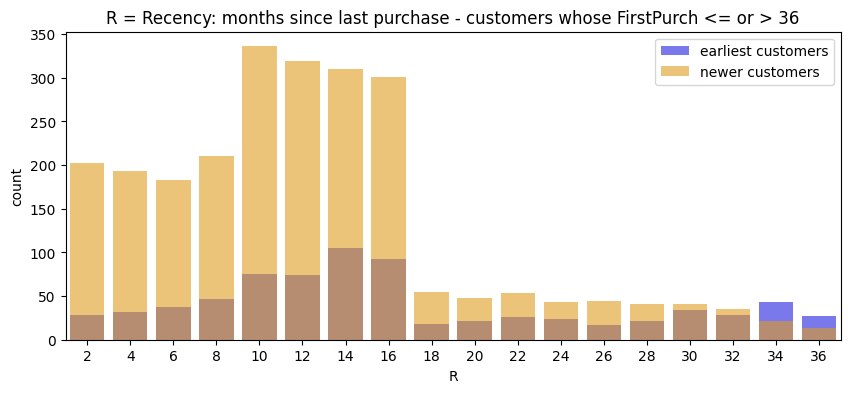

In [212]:
# Examine 'R' among early customers:
view_03 = df.query('FirstPurch > 36')
# view_04 = view_03.sort_values(by='R', ascending=True)
# view_04[:20]

view_05 = view_03['R'].value_counts()
view_05.sort_index(ascending=True)

view_06 = df.query('FirstPurch <= 36')

# Graph:
fig, axs = plt.subplots(1, 1, figsize=(10, 4))

sns.countplot(x='R', data=view_03, ax=axs, color='blue', alpha=0.6, label='earliest customers')
sns.countplot(x='R', data=view_06, ax=axs, color='orange', alpha=0.6, label='newer customers')

axs.set_title('R = Recency: months since last purchase - customers whose FirstPurch <= or > 36')

plt.show()

It looks kind of similar to the data for newer customers, with a spike from 18 to 16. (Although it is not clear why it is not an exact match) it is possible that the R>36 data was missing, and was filled in by a data scientist, with the aim of somehow matching the distribution of known values.

If so, the values of R for FirstPurch>36 are all completely fictitious.

Hypothesis A: better results can be obtained by replacing R with -36, for all FirstPurch>36 (this way, a NN or Random Forest can easily learn to ignore R for those values).

# Pre-Processing

In [213]:
# Print max val from each column:
for col in df.columns:
  print(f"{col}: {df[col].max()}")

Gender: 1
M: 475
R: 36
F: 12
FirstPurch: 99
ChildBks: 7
YouthBks: 5
CookBks: 7
DoItYBks: 5
RefBks: 4
ArtBks: 4
GeogBks: 6
ItalCook: 3
ItalAtlas: 2
ItalArt: 2
Florence: 1


In [214]:
df_clean = df.copy(deep=True)

my_mask = df_clean['FirstPurch'] > 36
df_clean.loc[my_mask, 'R'] = -36

view_07 = df_clean.query('FirstPurch > 36')
view_08 = view_07['R'].value_counts()
view_08.sort_index(ascending=True)

view_09 = view_07.sort_values(by='FirstPurch', ascending=False)
view_09[:5]

,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
2783,1,310,-36,12,99,2,2,2,2,0,0,4,0,0,0,0
1209,1,297,-36,12,94,1,0,7,1,2,1,0,0,0,0,0
2557,1,209,-36,10,92,4,0,3,0,1,0,1,0,0,0,0
2346,1,256,-36,11,92,1,2,5,1,0,0,0,0,0,0,0
858,1,171,-36,11,92,3,1,3,1,1,1,2,0,0,0,0


# Normalize

In [215]:
# Normalize.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

non_numer_columns = ['Gender', 'Florence']
# all others are numeric:
numeric_columns = df.columns.difference(non_numer_columns)

# Scale only the numeric columns:
scaled_numeric = scaler.fit_transform(df[numeric_columns])

# Convert to a data frame:
df_scaled_numeric = pd.DataFrame(scaled_numeric, columns=numeric_columns)

# Combine with the non-numeric columns (booleans or one-hot):
df_scaled = pd.concat([df_scaled_numeric, df.drop(columns=numeric_columns)], axis=1)


# Separate labels/targets (predicted variable):
labels = df_scaled['Florence']
df_scaled = df_scaled.drop(columns=['Florence'])

df_scaled.head(1)


# Repeat for df_clean:
scaled_numeric_clean = scaler.fit_transform(df_clean[numeric_columns])
df_scaled_numeric_clean = pd.DataFrame(scaled_numeric_clean, columns=numeric_columns)
df_scaled_clean = pd.concat([df_scaled_numeric_clean, df_clean.drop(columns=numeric_columns)], axis=1)

labels_clean = labels  # For now, labels are identical.
df_scaled_clean = df_scaled_clean.drop(columns=['Florence'])

print(labels_clean[0])
df_scaled_clean.head(1)

1


,ArtBks,ChildBks,CookBks,DoItYBks,F,FirstPurch,GeogBks,ItalArt,ItalAtlas,ItalCook,M,R,RefBks,YouthBks,Gender
0,-0.475125,-0.630523,-0.667496,-0.499272,-0.517513,-1.227436,-0.510395,-0.207615,-0.172513,-0.319747,0.099549,0.045579,-0.454014,-0.497276,0


In [216]:
# Idea: the presence or absence of purchases in a given category might be more
# important than the number of purchases in that category.
# Therefore, convert those columns to boolean.

non_bool_cols = ['M', 'R', 'F', 'FirstPurch']
bool_cols = df_scaled.columns.difference(non_bool_cols)

df_scaled_2 = df_scaled.copy(deep=True)
df_scaled_2[bool_cols] = (df_scaled[bool_cols] > 0).astype(int)

df_scaled_2.head(1)

df_scaled_clean_2 = df_scaled_clean.copy(deep=True)
df_scaled_clean_2[bool_cols] = (df_scaled_clean[bool_cols] > 0).astype(int)

df_scaled_clean_2.head(1)

,ArtBks,ChildBks,CookBks,DoItYBks,F,FirstPurch,GeogBks,ItalArt,ItalAtlas,ItalCook,M,R,RefBks,YouthBks,Gender
0,0,0,0,0,-0.517513,-1.227436,0,0,0,0,0.099549,0.045579,0,0,0


# Train Test Split

In [217]:
# Train Test Split.
from sklearn.model_selection import train_test_split

# Separate test data:
train_and_val, test, labels_train_and_val, labels_test \
    = train_test_split(df_scaled, labels, test_size=0.2, random_state=42)

clean_train_and_val, clean_test, clean_labels_train_and_val, clean_labels_test \
    = train_test_split(df_scaled_clean, labels_clean, test_size=0.2, random_state=42)

train_and_val_2, test_2, labels_train_and_val_2, labels_test_2 \
    = train_test_split(df_scaled_2, labels, test_size=0.2, random_state=42)

c2_train_and_val, c2_test, c2_labels_train_and_val, c2_labels_test \
    = train_test_split(df_scaled_clean_2, labels_clean, test_size=0.2, random_state=42)

In [218]:
print(train_and_val.shape)
print(test.shape)

(2560, 15)
(640, 15)


# Confusion Matrix helper function

In [219]:
# Helper function. For confusion matrix.
# Re-used code block from: MJC_post_EDA_Data_Mining_Midterm.ipynb [1].

import tensorflow as tf
# !apt-get install inkscape -y
!which inkscape
!inkscape --version

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import logging

# Suppress warnings:
tf.get_logger().setLevel(logging.ERROR)

def print_confusion_matrix(y_test, y_pred) -> None:
  cm = confusion_matrix(y_test, y_pred)
  # print("Confusion Matrix:")
  # print(cm)

  plt.figure(figsize=(2, 1.5))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=['NP', 'P'],
              yticklabels=['NP', 'P'],
              cbar=False)
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title('Confusion Matrix')
  plt.show()
  # Precision, recall, F1:,
  TP = cm[1, 1]  # True Positives
  FP = cm[0, 1]  # False Positives
  TN = cm[0, 0]  # True Negatives
  FN = cm[1, 0]  # False Negatives

  precision, recall, f1, accuracy = 0, 0, 0, 0
  if TP != 0:
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
  if precision + recall != 0:
    f1 = 2 * precision * recall / (precision + recall)
  if TP + TN + FP + FN != 0:
    accuracy = (TP + TN) / (TP + TN + FP + FN)
  auc = tf.keras.metrics.AUC()
  auc.update_state(y_test, y_pred)
  print(f"(Accuracy: {accuracy:.3f})")
  print(f"Precision: {precision:.3f}")
  print(f"Recall:    {recall:.3f}")
  print(f"F1:        {f1:.3f}")
  print(f"AUC:       {auc.result().numpy():.3f}")

/bin/bash: line 1: inkscape: command not found


# Methods

These are the stats if we just always guess the most common class:


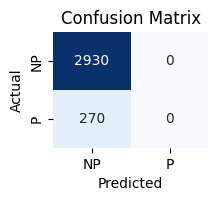

(Accuracy: 0.916)
Precision: 0.000
Recall:    0.000
F1:        0.000
AUC:       0.500


In [220]:
# Establish a baseline. Borrowed code [1].

print("These are the stats if we just always guess the most common class:")

# Confusion Matrix:
y_pred = [False] * len(labels)
print_confusion_matrix(labels.values, y_pred)

# Decision Tree

Decision Tree


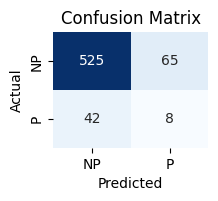

(Accuracy: 0.833)
Precision: 0.110
Recall:    0.160
F1:        0.130
AUC:       0.525

Decision Tree plus SMOTE


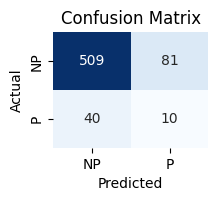

(Accuracy: 0.811)
Precision: 0.110
Recall:    0.200
F1:        0.142
AUC:       0.531


In [221]:
# Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=42)
model.fit(train_and_val, labels_train_and_val)
y_pred = model.predict(test)
print("Decision Tree")
print_confusion_matrix(labels_test, y_pred)

# With SMOTE:

from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)  # 'auto' oversamples minority class to match majority class size
X_resampled, y_resampled = smote.fit_resample(train_and_val, labels_train_and_val)

model.fit(X_resampled, y_resampled)
y_pred = model.predict(test)
print()
print("Decision Tree plus SMOTE")
print_confusion_matrix(labels_test, y_pred)

Decsion Tree - using 'clean' data:


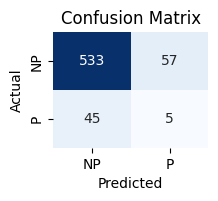

(Accuracy: 0.841)
Precision: 0.081
Recall:    0.100
F1:        0.089
AUC:       0.502

Decision Tree - using 'clean' data plus SMOTE:


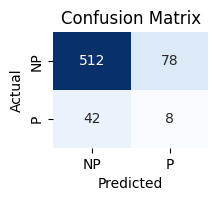

(Accuracy: 0.812)
Precision: 0.093
Recall:    0.160
F1:        0.118
AUC:       0.514


In [222]:
model.fit(clean_train_and_val, clean_labels_train_and_val)
y_pred = model.predict(clean_test)
print("Decsion Tree - using 'clean' data:")
print_confusion_matrix(clean_labels_test, y_pred)

# With SMOTE:
X_resampled, y_resampled = smote.fit_resample(clean_train_and_val, clean_labels_train_and_val)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(clean_test)
print()
print("Decision Tree - using 'clean' data plus SMOTE:")
print_confusion_matrix(clean_labels_test, y_pred)

SMOTE provides a slight boost to both F1 and AUC.

Notably, accuracy (which we consider not a primary metric for this probelm) is reduced.

True for both original and 'clean' data.

Decision Tree - using binary data:


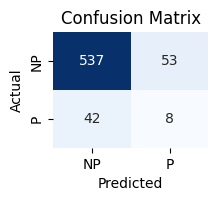

(Accuracy: 0.852)
Precision: 0.131
Recall:    0.160
F1:        0.144
AUC:       0.535

Decision Tree - using binary data plus SMOTE:


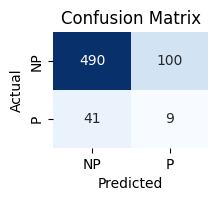

(Accuracy: 0.780)
Precision: 0.083
Recall:    0.180
F1:        0.113
AUC:       0.505
-------------------------------------------------------------------

Decision Tree - using 'clean' binary data:


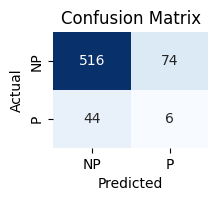

(Accuracy: 0.816)
Precision: 0.075
Recall:    0.120
F1:        0.092
AUC:       0.497

Decision Tree - using 'clean' binary data plus SMOTE:


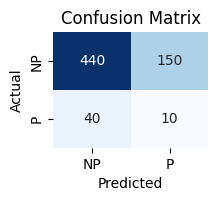

(Accuracy: 0.703)
Precision: 0.062
Recall:    0.200
F1:        0.095
AUC:       0.473


In [223]:
# Decision tree using binary data:
model = DecisionTreeClassifier(random_state=42)
model.fit(train_and_val_2, labels_train_and_val_2)
y_pred = model.predict(test)
print("Decision Tree - using binary data:")
print_confusion_matrix(labels_test, y_pred)

# With SMOTE:
X_resampled, y_resampled = smote.fit_resample(train_and_val_2, labels_train_and_val_2)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(test)
print()
print("Decision Tree - using binary data plus SMOTE:")
print_confusion_matrix(labels_test, y_pred)
print('-------------------------------------------------------------------\n')

# Decision tree using 'clean' binary data:
model = DecisionTreeClassifier(random_state=42)
model.fit(c2_train_and_val, c2_labels_train_and_val)
y_pred = model.predict(clean_test)
print("Decision Tree - using 'clean' binary data:")
print_confusion_matrix(clean_labels_test, y_pred)

# With SMOTE:
X_resampled, y_resampled = smote.fit_resample(c2_train_and_val, c2_labels_train_and_val)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(test)
print()
print("Decision Tree - using 'clean' binary data plus SMOTE:")
print_confusion_matrix(labels_test, y_pred)

For the case of 'binary' data (purchase stats for each category reduced to a binary purchased/not-purchased value), SMOTE reduces AUC in both cases.

The binary data Decision Tree without SMOTE gives roughly equal results to the original data Decision Tree with SMOTE.

Best Results for a Decision Tree:

F1:        0.144

AUC:       0.535

# NN

In [224]:
# Quick and simple: run a NN on both cases:

import tensorflow as tf
from tensorflow.keras import layers, models, metrics

model = models.Sequential([
    layers.Dense(15, activation='relu', input_shape=(15,)),
    layers.Dense(15, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_clean = models.Sequential.from_config(model.get_config())
model_2 = models.Sequential.from_config(model.get_config())
model_2_clean = models.Sequential.from_config(model.get_config())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [225]:
import numpy as np

# Get unique class labels and their counts
unique_classes, class_counts = np.unique(labels_train_and_val, return_counts=True)

# Print out the class distribution
print("Class Distribution:")
for class_label, count in zip(unique_classes, class_counts):
    print(f"Class {class_label}: {count} samples")

Class Distribution:
Class 0: 2340 samples
Class 1: 220 samples


In [226]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)  # 'auto' oversamples minority class to match majority class size
X_resampled, y_resampled = smote.fit_resample(train_and_val, labels_train_and_val)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_resampled,
    y_resampled,
    epochs=12,
    batch_size=32,
    validation_split=0.2  # This splits 20% of the data for validation automatically
)

Epoch 1/12
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5144 - loss: 0.6944 - val_accuracy: 0.0588 - val_loss: 0.9039
Epoch 2/12
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6185 - loss: 0.6441 - val_accuracy: 0.1068 - val_loss: 0.9643
Epoch 3/12
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6504 - loss: 0.6247 - val_accuracy: 0.1645 - val_loss: 0.9372
Epoch 4/12
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6602 - loss: 0.6094 - val_accuracy: 0.2457 - val_loss: 0.8916
Epoch 5/12
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6803 - loss: 0.5939 - val_accuracy: 0.2938 - val_loss: 0.8792
Epoch 6/12
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6876 - loss: 0.5831 - val_accuracy: 0.3024 - val_loss: 0.9011
Epoch 7/12
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6898 - loss: 0.5772 - val_accuracy: 0.3568 - val_loss: 0.8407
Epoch 8/12
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7055 - loss: 0.5581 - val_accuracy: 0.

In [227]:
X_resampled, y_resampled = smote.fit_resample(clean_train_and_val, clean_labels_train_and_val)

model_clean.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_clean = model_clean.fit(X_resampled, y_resampled, epochs=8, batch_size=32, validation_split=0.2)

Epoch 1/8
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6157 - loss: 0.6457 - val_accuracy: 0.2147 - val_loss: 0.9239
Epoch 2/8
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6338 - loss: 0.6273 - val_accuracy: 0.2137 - val_loss: 0.9236
Epoch 3/8
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6411 - loss: 0.6228 - val_accuracy: 0.2212 - val_loss: 0.9290
Epoch 4/8
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6726 - loss: 0.5991 - val_accuracy: 0.2543 - val_loss: 0.8918
Epoch 5/8
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6798 - loss: 0.5918 - val_accuracy: 0.2746 - val_loss: 0.8698
Epoch 6/8
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6777 - loss: 0.5828 - val_accuracy: 0.3066 - val_loss: 0.8408
Epoch 7/8
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6839 - loss: 0.5732 - val_accuracy: 0.3066 - val_loss: 0.8477
Epoch 8/8
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6789 - loss: 0.5746 - val_accuracy: 0.3483 - v

In [228]:
X_resampled, y_resampled = smote.fit_resample(train_and_val_2, labels_train_and_val_2)

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_2 = model_2.fit(X_resampled, y_resampled, epochs=10, batch_size=32, validation_split=0.2)
print()
print()

X_resampled, y_resampled = smote.fit_resample(c2_train_and_val, c2_labels_train_and_val)

model_2_clean.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_2_clean = model_2_clean.fit(X_resampled, y_resampled, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5999 - loss: 0.6621 - val_accuracy: 0.0011 - val_loss: 1.0018
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6302 - loss: 0.6295 - val_accuracy: 0.0759 - val_loss: 0.9676
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6464 - loss: 0.6181 - val_accuracy: 0.1560 - val_loss: 0.9801
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6609 - loss: 0.6003 - val_accuracy: 0.2415 - val_loss: 0.9104
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6743 - loss: 0.5865 - val_accuracy: 0.2821 - val_loss: 0.9032
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6792 - loss: 0.5881 - val_accuracy: 0.4188 - val_loss: 0.7930
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6893 - loss: 0.5761 - val_accuracy: 0.3835 - val_loss: 0.8369
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6958 - loss: 0.5684 - val_accuracy: 0.

In [229]:
# print("Metrics stored in history:")
# for metric in history.history.keys():
#     print(metric)

# print()
# print("Metrics stored in clean history:")
# for metric in history_clean.history.keys():
#     print(metric)

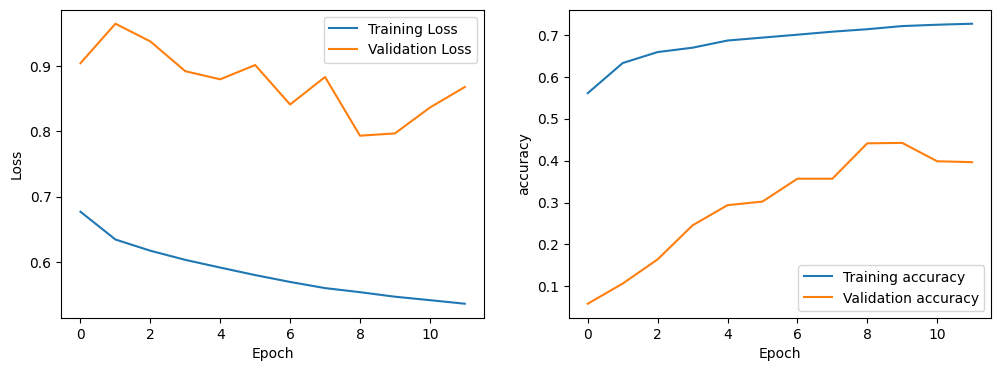

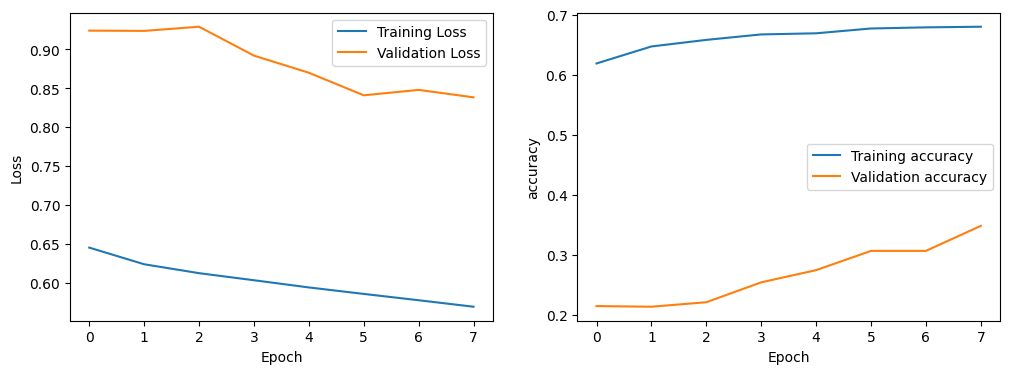

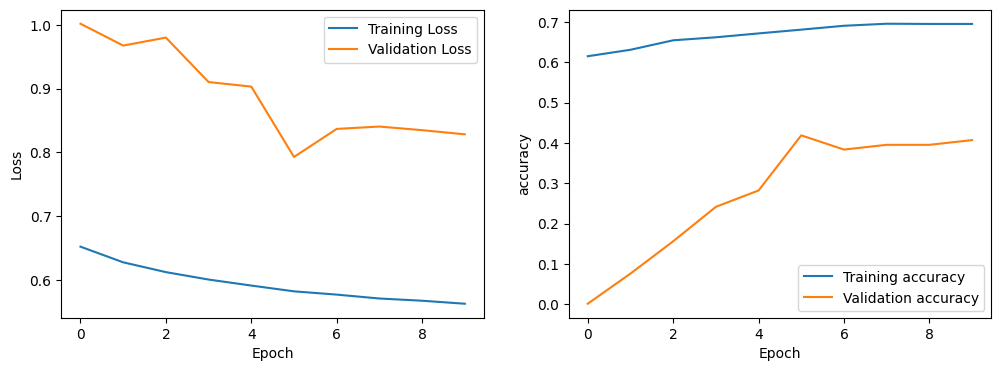

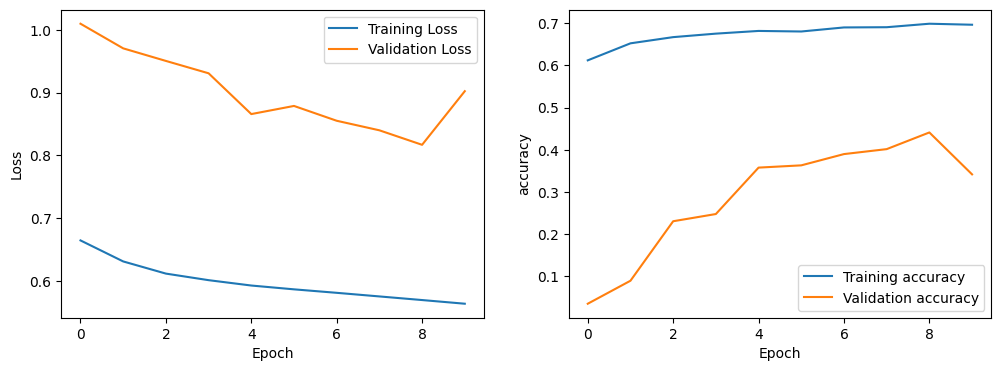

In [230]:
for h in [history, history_clean, history_2, history_2_clean]:
  plt.figure(figsize=(12, 4))
  for i, (metric, ylabel) in enumerate([('loss', 'Loss'), ('accuracy', 'accuracy')]):
      plt.subplot(1, 2, i+1)
      # Check if the metric exists in the history
      if metric in h.history:
          plt.plot(h.history[metric], label=f'Training {ylabel}')
      else:
          print(f"Warning: {metric} not found in history.")
      # plt.plot(h.history[metric], label=f'Training {ylabel}')
      plt.plot(h.history.get(f'val_{metric}', []), label=f'Validation {ylabel}')
      plt.xlabel('Epoch')
      plt.ylabel(ylabel)
      plt.legend()

plt.show()

In [231]:
print(labels_test.value_counts())
print(labels_test.shape)

Florence
0    590
1     50
Name: count, dtype: int64
(640,)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
NN:


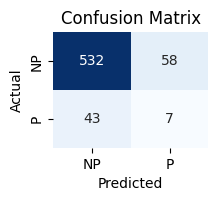

(Accuracy: 0.842)
Precision: 0.108
Recall:    0.140
F1:        0.122
AUC:       0.521

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
NN - using clean data:


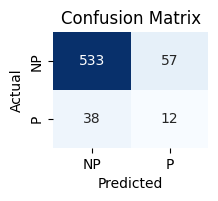

(Accuracy: 0.852)
Precision: 0.174
Recall:    0.240
F1:        0.202
AUC:       0.572


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
NN - using binary data:


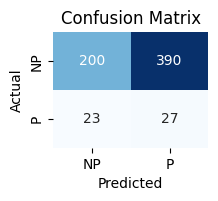

(Accuracy: 0.355)
Precision: 0.065
Recall:    0.540
F1:        0.116
AUC:       0.439

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
NN - using 'clean' binary data:


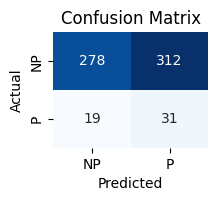

(Accuracy: 0.483)
Precision: 0.090
Recall:    0.620
F1:        0.158
AUC:       0.546


In [232]:
# Apply test data:
y_pred = model.predict(test)
# convert to 0s and 1s:
y_pred = [1 if x > 0.5 else 0 for x in y_pred]
print("NN:")
print_confusion_matrix(labels_test, y_pred)

print()
y_pred_clean = model_clean.predict(clean_test)
y_pred_clean = [1 if x > 0.5 else 0 for x in y_pred_clean]
print("NN - using clean data:")
print_confusion_matrix(clean_labels_test, y_pred_clean)

print()
print()
y_pred_2 = model_2.predict(test)
y_pred_2 = [1 if x > 0.5 else 0 for x in y_pred_2]
print("NN - using binary data:")
print_confusion_matrix(labels_test, y_pred_2)

print()
y_pred_2_clean = model_2_clean.predict(clean_test)
y_pred_2_clean = [1 if x > 0.5 else 0 for x in y_pred_2_clean]
print("NN - using 'clean' binary data:")
print_confusion_matrix(clean_labels_test, y_pred_2_clean)

The NNs fare vary poorly with the binary versions of the category purchase data.

All results shown above are With SMOTE. Results without SMOTE were not as good.

Best Results for a NN:

F1:        0.181

AUC:       0.566

('clean' data plus SMOTE, aka 'model_clean')

# Random Forest

Feature importance by contribution:
M                   : 0.3226
FirstPurch          : 0.1343
R                   : 0.1147
F                   : 0.0736
ArtBks              : 0.0545
GeogBks             : 0.0449
CookBks             : 0.0432
ChildBks            : 0.0427
DoItYBks            : 0.0373
RefBks              : 0.0311
YouthBks            : 0.0306
Gender              : 0.0236
ItalCook            : 0.0233
ItalArt             : 0.0136
ItalAtlas           : 0.0101

Basic Random Forest


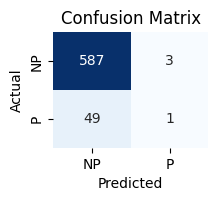

(Accuracy: 0.919)
Precision: 0.250
Recall:    0.020
F1:        0.037
AUC:       0.507

Basic Random Forest plus SMOTE:


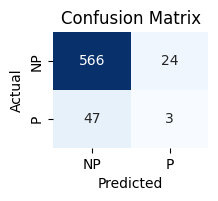

(Accuracy: 0.889)
Precision: 0.111
Recall:    0.060
F1:        0.078
AUC:       0.510
---------------------------------------------------------------------


Using 'clean' data:


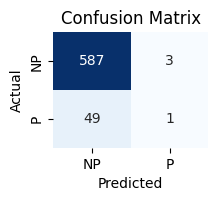

(Accuracy: 0.919)
Precision: 0.250
Recall:    0.020
F1:        0.037
AUC:       0.507

Using 'clean' data plus SMOTE:


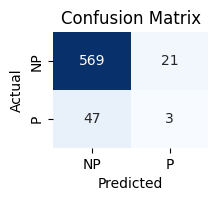

(Accuracy: 0.894)
Precision: 0.125
Recall:    0.060
F1:        0.081
AUC:       0.512
---------------------------------------------------------------------


Using binary data:


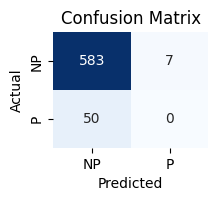

(Accuracy: 0.911)
Precision: 0.000
Recall:    0.000
F1:        0.000
AUC:       0.494

Using binary data plus SMOTE:


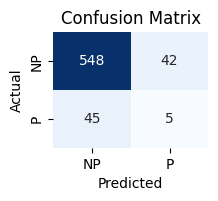

(Accuracy: 0.864)
Precision: 0.106
Recall:    0.100
F1:        0.103
AUC:       0.514
---------------------------------------------------------------------


Using 'clean' binary data:


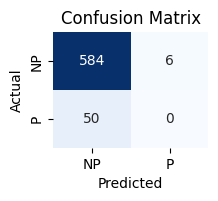

(Accuracy: 0.912)
Precision: 0.000
Recall:    0.000
F1:        0.000
AUC:       0.495

Using 'clean' binary data plus SMOTE:


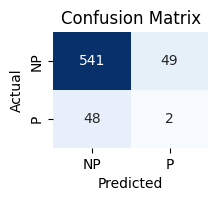

(Accuracy: 0.848)
Precision: 0.039
Recall:    0.040
F1:        0.040
AUC:       0.478


In [233]:
# Random Forest.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(train_and_val, labels_train_and_val)

# Print list of most important features:
importances = model.feature_importances_
feature_names = train_and_val.columns
sorted_indices = importances.argsort()[::-1]
print("Feature importance by contribution:")
# Use formatted white space and 4 sig figs:
for i in sorted_indices:
    print(f"{feature_names[i]:20s}: {importances[i]:.4f}")

print()
print("Basic Random Forest")
y_pred = model.predict(test)
print_confusion_matrix(labels_test, y_pred)

# SMOTE version:
print()
print("Basic Random Forest plus SMOTE:")
X_resampled, y_resampled = smote.fit_resample(train_and_val, labels_train_and_val)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(test)
print_confusion_matrix(labels_test, y_pred)
print('---------------------------------------------------------------------\n')

# Random Forest with clean data:
print()
print("Using 'clean' data:")
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(clean_train_and_val, clean_labels_train_and_val)

y_pred = model.predict(clean_test)
print_confusion_matrix(clean_labels_test, y_pred)

# SMOTE version:
print()
print("Using 'clean' data plus SMOTE:")
X_resampled, y_resampled = smote.fit_resample(clean_train_and_val, clean_labels_train_and_val)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(clean_test)
print_confusion_matrix(clean_labels_test, y_pred)
print('---------------------------------------------------------------------\n')

# Random Forest with binary data:
print()
print("Using binary data:")
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(train_and_val_2, labels_train_and_val_2)

y_pred = model.predict(test_2)
print_confusion_matrix(labels_test_2, y_pred)

# SMOTE version:
print()
print("Using binary data plus SMOTE:")
X_resampled, y_resampled = smote.fit_resample(train_and_val_2, labels_train_and_val_2)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(test_2)
print_confusion_matrix(labels_test_2, y_pred)
print('---------------------------------------------------------------------\n')

# Random Forest with clean binary data:
print()
print("Using 'clean' binary data:")
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(c2_train_and_val, c2_labels_train_and_val)

y_pred = model.predict(clean_test)
print_confusion_matrix(clean_labels_test, y_pred)

# SMOTE version:
print()
print("Using 'clean' binary data plus SMOTE:")
X_resampled, y_resampled = smote.fit_resample(c2_train_and_val, c2_labels_train_and_val)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(clean_test)
print_confusion_matrix(clean_labels_test, y_pred)

SMOTE did not improve AUC in every case, but it did improve it in the most succesful cases.

Importantly, in all the usable cases (i.e. AUC > 0.5), SMOTE improved both AUC (slightly) and F1 score (dramatically).

Best Results for Random Forest:

F1:        0.103

AUC:       0.514

(for 'binary' data plus SMOTE)

# Conclusion and Testing

Best Results from all models tested:

F1: 0.181

AUC: 0.566

(NN, 'clean' data plus SMOTE, aka 'model_clean')

In [234]:
# # This time, train using ALL of the non-test data.

# X_resampled, y_resampled = smote.fit_resample(df_scaled_clean, labels_clean)

# model_clean.fit(X_resampled, y_resampled, epochs=10)                   # <-- ALL the non-test data.

In [235]:
test_url = 'http://pluto.hood.edu/~dong/datasets/CBC_800.csv'
TEST_DATA = pd.read_csv(test_url, header='infer')
TEST_DATA.head(1)

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,1576,13039,0,166,14,2,16,0,1,0,0,0,0,0,0,0,0,0


In [236]:
test_df = TEST_DATA.copy(deep=True)

test_df_labels = test_df['Florence']

# Drop IDs and labels:
ids_and_labels = ['ID#', 'Seq#', 'Florence']
test_df_clean = test_df.drop(ids_and_labels, axis=1)

# 'clean' feature R where FirstPurch > 36:
my_mask = test_df['FirstPurch'] > 36
test_df_clean.loc[my_mask, 'R'] = -36

# Normalize the test data:
# (repeat the exact same steps as for normalization of training data)
non_numer_columns = ['Gender', 'Florence']
numeric_columns = test_df_clean.columns.difference(non_numer_columns)
scaled_numeric = scaler.fit_transform(test_df_clean[numeric_columns])
df_scaled_numeric = pd.DataFrame(scaled_numeric, columns=numeric_columns)
df_scaled = pd.concat([df_scaled_numeric, test_df_clean.drop(columns=numeric_columns)], axis=1)

In [237]:
print(test_df_labels.shape)
print(test_df_labels.value_counts())

(800,)
Florence
0    732
1     68
Name: count, dtype: int64


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


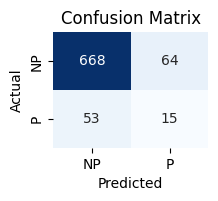

(Accuracy: 0.854)
Precision: 0.190
Recall:    0.221
F1:        0.204
AUC:       0.567


In [238]:
# Test.
y_pred = model_clean.predict(df_scaled)
y_pred = [1 if x > 0.5 else 0 for x in y_pred]
print_confusion_matrix(test_df_labels, y_pred)

Final Results:

F1: 0.191

AUC: 0.570

# References

[1] MJC_post_EDA_Data_Mining_Midterm.ipynb

# Print All

In [239]:
# PRINT TO PDF
# do not include the output from installation.
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc
!pip install nbconvert

# Clear output:
from IPython.display import clear_output
clear_output()

In [240]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [241]:
!jupyter nbconvert  '/content/drive/MyDrive/Colab Notebooks/MJC_SS_Data_Mining_Final.ipynb' --to pdf

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/MJC_SS_Data_Mining_Final.ipynb to pdf
[NbConvertApp] Writing 20062 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 14227 bytes to /content/drive/MyDrive/Colab Notebooks/MJC_SS_Data_Mining_Final.pdf
